## Count Data
### This chapter accompanies Long, Chapter 8. I rely heavily on the formula found on pp. 218-233

Many variables in the social sciences consist of integer counts. Number of times a candidate runs for office, frequency of conflict, number of terror attacks, number of war casualties, number of positive statements about a candidate, number of homicides in a city, and so forth, are examples of "count data." It may be appealing to assume that because these variables take on many values, it is reasonable to use ordinary least squares. Generally, this is ill-advised, since the distribution of these variables are non-normal.

We will consider several versions of count regression models. Starting with the **Poisson Regression Model** (PRM), we will estimate the mean rate of an observation, conditional on a set of covariates. A strong -- often untenable assumption of the PRM is that the mean of the rate of an observation equals the variance. If you recall, the Poisson density function states that $E(\mu)=var(y)$. This is perhaps the primary reason the (PRM) often provides a relatively poor fit-to-data. If the variance is greater than the mean, we are said to encounter **over-dispersion**.$E(\mu)<var(y)$


if it is less, then we encounter **under-dispersion**. If we encounter the former, we may estimate a **negative binomial** regression model.

One cause of under-dispersion is a preponderance of zeros. Think about recording the number of homicides in cities throughout the U.S. Many cities will have zero homicides. If we look at a histogram of our data, a bunch of observations will cluster at zero. This will deflate the variance estimates. In this case, we might think of our estimation occuring in two stages: First, estimate the probability that a positive count is observed, and then conditional on this probability, estimate the estimated number of counts. In the above example, estimate whether at least one homicide is observed, and conditional on this, estimate the expected number of homicides.

It's perhaps easiest to begin with the less-plausible, though mathematically simpler Poisson Model.

## PRM

Ignoring covariates, variable $y$ is said to be distribute poisson if,

$$p(y|\mu)={{exp(-\mu)\mu^y}\over{y!}}$$

If $y$ takes on values from 0, 1, 2, 3, etc. (Long 1997, p. 218). In this density, the only parameter that governs the shape of the density is $\mu$ or the "rate" parameter. If $\mu=0.12$, let's calculate the probability of 3 discrete values: 1, 2, and 3.


In [1]:
install.packages("rstan")


  There is a binary version available but the source version is later:
      binary source needs_compilation
rstan 2.21.1 2.21.2              TRUE



installing the source package ‘rstan’


Warning message in install.packages("rstan"):
“installation of package ‘rstan’ had non-zero exit status”


In [7]:
(exp(-0.12)*0.12^1)/factorial(1)
(exp(-0.12)*0.12^2)/factorial(2)
(exp(-0.12)*0.12^3)/factorial(3)

dpois(1,0.12)
dpois(2,0.12)
dpois(3,0.28)




[1] 0.1064305

[1] 0.006385827

[1] 0.0002554331

[1] 0.1064305

[1] 0.006385827

[1] 0.002765161

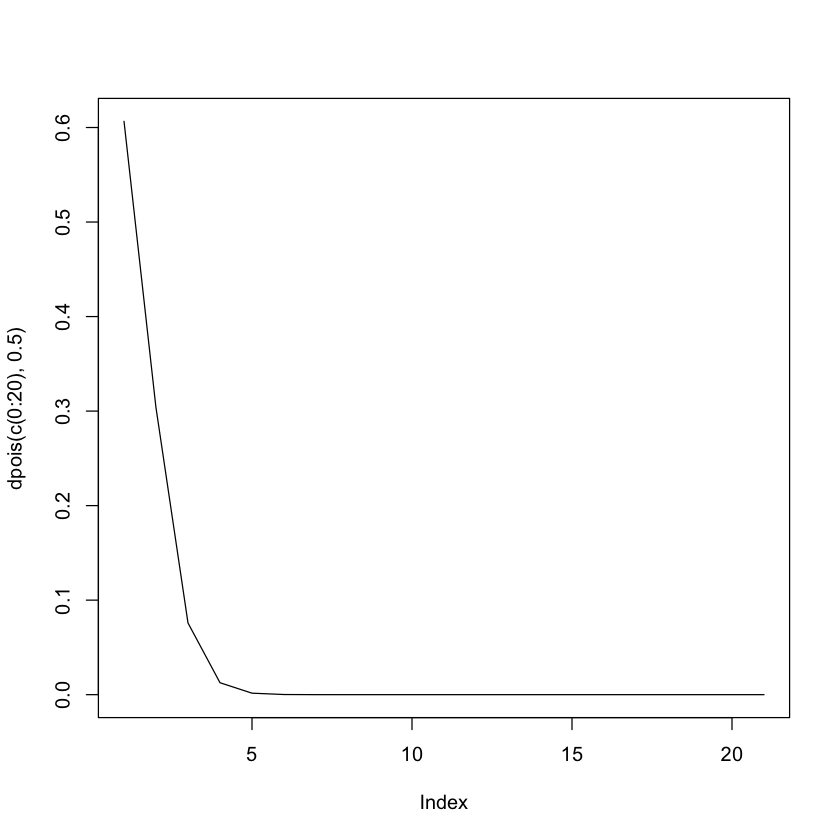

In [17]:
plot(dpois(c(0:20),0.5), type="l", main="")


A characteristic of the poisson distribution is that $E(y)=var(y)=\mu$, an assumption called **equidispersion**.

If $\mu$ is the rate parameter, we can then model $\mu_i$ based on a set of covariates. That is,

$$\mu_i=E(y_i|x_i)=exp(\alpha+\beta x_i)$$

We exponentiate $\alpha+\beta x_i$ because this prediction must be positive; the rate parameter must be positive. What this allows us to do is now (again) incorporate a structureal component in the model. Perhaps we predict the number of homicides with the size of the population. Or, we predict the number of war casualties military spending.  Incorporating this component allows us to move from the poisson density to the PRM.

Long (1997, p. 223) notes that this is form of a non-linear regression model with heteroskedastic errors. Let's see why.

$$\mu_i=exp(\alpha+\beta x_i)$$

Let's just assume $\alpha=-0.25$, and $\beta=0.13$ as Long does (p. 221). If we plot the expected values of $y$ for a number of $x$ values, then


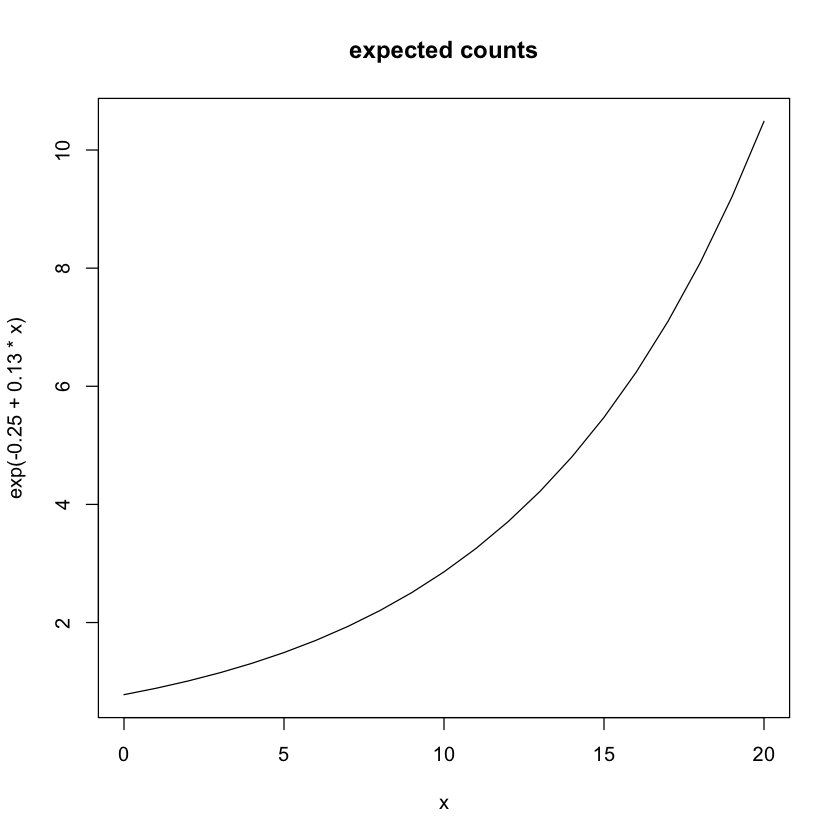

In [22]:
x<-c(0:20)
plot(x, exp(-0.25+0.13*x), type="l", main="expected counts")


When $x=1$, then the expected number of counts -- the rate parameter -- is 0.89. When $x=10$ then the expected number of counts is 2.85. But, recall the errors in any model is just the prediction $E(y|x)$ minus the actual counts. Well, we also know that the distribution of errors around each point, if distributed poisson, will vary depending upon $E(y|x)$. Here is the poisson density when the expected value is 0.89 (corresponding to $x=1$).


But here is the distribution when the expectation is 2.85.


Clearly, we cannot assume homoskedasticity. And, because we know that the rate parameter has to equal the variance, we then know that $E(y|x)=exp(\alpha+\beta x_i)=var(y|x)$. The variance is a function of the covariates. Again, what this implies is that if we have a count process that is poisson, and we attempt to estimate an OLS, we will violate the assumption of identical and normally distributed errors.

With $k$ predictors, then

$$\mu_i=exp(\alpha+\sum_K \beta_k x_{k,i})$$

$$\mu_i=exp(\alpha+\beta_1 x_{1}+\beta_2 x_{1}+\beta_3 x_{2}.....)$$



And, 

$$p(y|x)={{exp(-exp(\alpha+\sum_K \beta_k x_{k,i}))exp(\alpha+\sum_K \beta_k x_{k,i})^{y_i}}\over{y_i!}}$$

### The PRM Likelihood
The likelihood of the PRM with $k$ predictors is.

$$\prod_{i=1}^{N}p(y_i|\mu_i)=\prod_{i=1}^{N}{{exp(-exp(\alpha+\sum_K \beta_k x_{k,i}))exp(\alpha+\sum_K \beta_k x_{k,i})^{y_i}}\over{y_i!}}$$
 
The log of the likelihood is then,

$$log(\prod_{i=1}^{N}p(y_i|\mu_i))=\sum_{i=1}^{N}log{{exp(-exp(\alpha+\sum_K \beta_k x_{k,i}))exp(\alpha+\sum_K \beta_k x_{k,i})^{y_i}}\over{y_i!}}$$

If the expected value of the PRM is $E(y|x)=exp(\alpha+\sum_K \beta_k x_{k,i})$. As Long notes, there are a variety of methods available to interpret these results.

Let's start by considering the partial derivative of $E(y|x)$ with respect to $x_k$. Using the chain-rule. Call $u=\alpha+\sum_K \beta_k x_{k,i})$. So, ${{\partial y}\over{\partial u}}{{\partial u}\over{\partial x}}$. For $E(y|x)$ 

$${{\partial E(Y|X)}\over{\partial x_k}}={{\partial exp(u)}\over{\partial u}}{{\partial u \beta}\over{\partial x_k}}$$

which is

$$exp(\alpha+\sum_K \beta_k x_{k,i})\beta_k=E(Y|X)\beta_k$$

So, the effect of $x_k$ on $y$ is now a function of the rate parameter \emph{and} the expected effect of $x_k$ on that rate parameter. It's not a constant change in the expected count; instead it's a function of how $x_k$ affects the rate as well as how all others relate to the rate! Again, this makes the model somewhat more difficult to interpret.

What effect does a $d_k$ change in $x_k$ have on the expected count. Take the ratio of the the prediction including the change over the prediction absent the change (Long 1997, p. 225):

$${{E(y|X, x_k+d_k)}\over{E(y|X, x_k)}}$$.

The numerator is $E(y|X, x_k+d_k)=exp(\beta_0)exp(\beta_1 x_1)exp(\beta_2 x_2)...exp(\beta_1 x_k)exp(\beta_k d_k)$. The denominator is identical with the exception of the last term (why?). $E(y|X, x_k)=exp(\beta_0)exp(\beta_1 x_1)exp(\beta_2 x_2)...exp(\beta_1 x_k)$. If we take the ratio of the two, we're left with $exp(\beta_k d_k)$. Which lends itself to the interpretation that for every $d_k$ change in $x_k$ we're left with an expected $exp(\beta_k d_k)$ change in the expected count of y. As always $d_k$ could be anything. It could be 1, corresponding to the common ``unit change'' interpretation. It could be a change going from the 10th to 90th percentiles. It could be a standard deviation. Regardless, we know that the exponentiated term indicates the change in the expected outcome (of course, holding constant the remaining variables) (Long 1997 p. 225).

Similarly, we could calculate the change in the expected value of $y$ with a discrete change in $x$. We would just calculate the expected value at two values of $x_k$ and take the difference. 

Finally, we could use the model to generate the predicted probability of a count

$$pr(y=m|x)={{exp(-exp(\alpha+\sum_K \beta_k x_{k,i}))exp(\alpha+\sum_K \beta_k x_{k,i})^{m}}\over{m!}}$$

So, given our model, we could predict the probability that $m=1$, 2, and so forth.



Loading required package: pscl

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



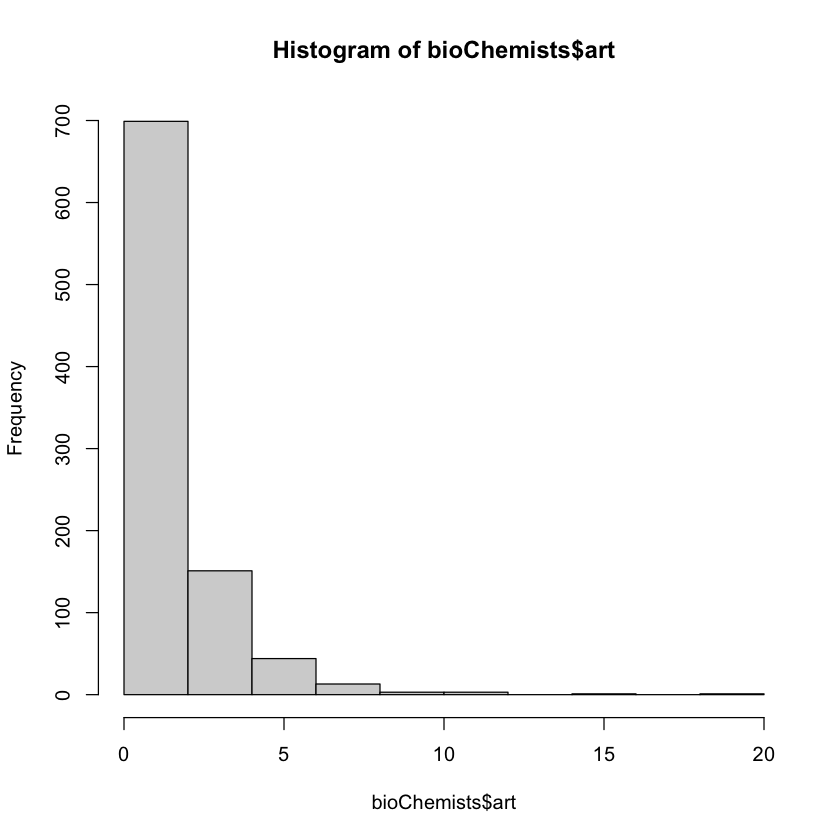

In [3]:
#install.packages('pscl')
require(pscl)
data(bioChemists)
hist(bioChemists$art)


Let's use data from the **pscl** package. It's not a political example, but it will suffice. The data consist of the productivity of 915 biochemistry students after receiving PhD. Clearly the data are non-normal.


In [4]:
glm(art~1, data=bioChemists, 
    family=poisson(link="log"))
exp(0.5264)
mean(bioChemists$art)


Call:  glm(formula = art ~ 1, family = poisson(link = "log"), data = bioChemists)

Coefficients:
(Intercept)  
     0.5264  

Degrees of Freedom: 914 Total (i.e. Null);  914 Residual
Null Deviance:	    1817 
Residual Deviance: 1817 	AIC: 3487

[1] 1.692827

[1] 1.692896

In this case $log(\mu)=0.52$, so $exp(0.52)=\mu=E(y)$. The expected count from this data is 1.68 articles. The poisson density doesn't fit the data well, however. The distribution underpredicts zero counts and extreme counts.



    FALSE      TRUE 
0.6994536 0.3005464 

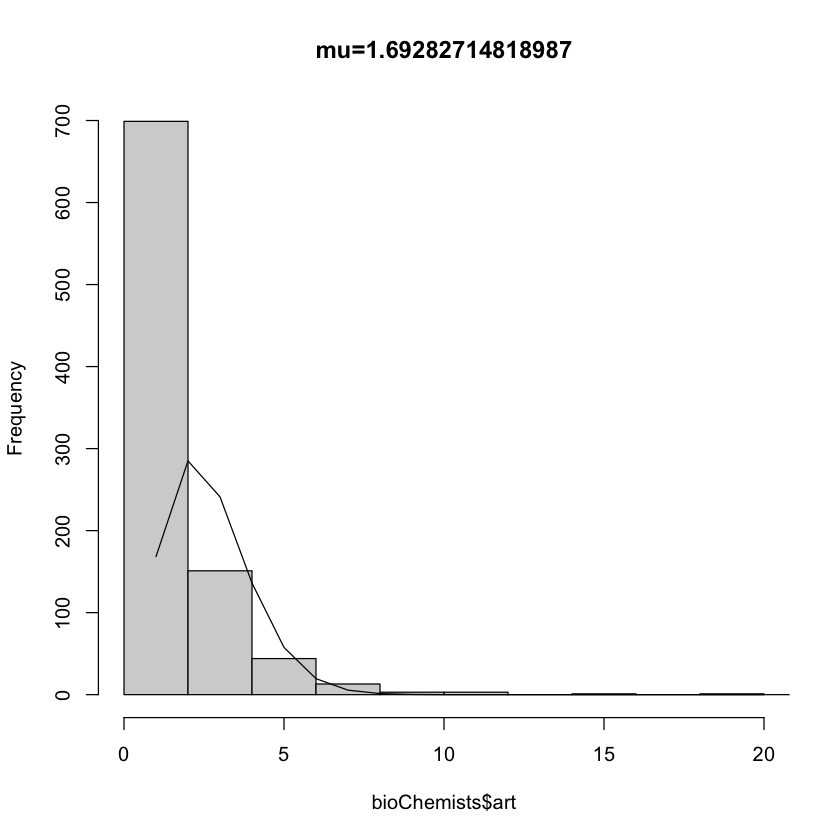

In [6]:
hist(bioChemists$art,  main="mu=1.69282714818987", nclass=10)
lines(dpois(c(0:20),1.69282714818987)*length(bioChemists$art), type="l")

table(bioChemists$art==0)/(640+275)


Part of this may be due to heterogeneity across units in our data -- for instance, if males and females vary with respect to productivity, this may be the reason why the model fits so poorly.


In [16]:
bioChemists$female<-as.numeric(bioChemists$fem)-1
summary(glm(art~female, data=bioChemists, 
    family=poisson(link="log")))
a<-glm(art~female, data=bioChemists, 
    family=poisson(link="log"))
paste("Expected Male Article:", exp(coef(a)[1]+coef(a)[2]*0))

print("")

cat("Expected Female Article:", exp(coef(a)[1]+coef(a)[2]*1))

print("")
paste("Expected Difference Article:", exp(coef(a)[1]+coef(a)[2]*0)-exp(coef(a)[1]+coef(a)[2]*1))




Call:
glm(formula = art ~ female, family = poisson(link = "log"), data = bioChemists)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9404  -1.7148  -0.4119   0.4139   7.3221  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.63265    0.03279  19.293  < 2e-16 ***
female      -0.24718    0.05187  -4.765 1.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1817.4  on 914  degrees of freedom
Residual deviance: 1794.4  on 913  degrees of freedom
AIC: 3466.1

Number of Fisher Scoring iterations: 5


[1] "Expected Male Article: 1.88259109332529"

[1] ""
Expected Female Article: 1.470309[1] ""


[1] "Expected Difference Article: 0.412282304647177"

If we plug in these numbers to get a prediction for males and then for females, we see that males are likely to produce slightly more articles (0.41). Let's make the model more complex, by including the number of kids the student has under the age of 5 and whether the student is married.


In [17]:
bioChemists$married<-as.numeric(bioChemists$mar)-1
summary(glm(art~female+kid5+married, data=bioChemists, 
    family=poisson(link="log")))
a<-glm(art~female+kid5+married, data=bioChemists, 
    family=poisson(link="log"))



Call:
glm(formula = art ~ female + kid5 + married, family = poisson(link = "log"), 
    data = bioChemists)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0776  -1.6856  -0.3729   0.4936   6.9981  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.63656    0.05457  11.665  < 2e-16 ***
female      -0.28549    0.05433  -5.255 1.48e-07 ***
kid5        -0.16118    0.03934  -4.097 4.19e-05 ***
married      0.13271    0.06092   2.179   0.0294 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1817.4  on 914  degrees of freedom
Residual deviance: 1776.7  on 911  degrees of freedom
AIC: 3452.5

Number of Fisher Scoring iterations: 5


Now we see that gender is still related to productivity, as is marital status (married students produce more articles), and number of kids slightly depress productivity. How do we interpret the kids variable?


In [18]:
cat("Expected Articles, 1 Kid (All Variables=Mean):", exp(coef(a)[1]+coef(a)[2]*max(bioChemists$female)
                                     +coef(a)[3]*1+coef(a)[3]*max(bioChemists$married)))

print("")

cat("Expected Articles, 2 Kid (All Variables=Mean):", exp(coef(a)[1]+coef(a)[2]*max(bioChemists$female)
                                     +coef(a)[3]*2+coef(a)[3]*max(bioChemists$married)))

print("")


cat("Expected Articles, 3 Kid (All Variables=Mean):", exp(coef(a)[1]+coef(a)[2]*max(bioChemists$female)
                                     +coef(a)[3]*3+coef(a)[3]*max(bioChemists$married)))


Expected Articles, 1 Kid (All Variables=Mean): 1.029116[1] ""
Expected Articles, 2 Kid (All Variables=Mean): 0.8759185[1] ""
Expected Articles, 3 Kid (All Variables=Mean): 0.7455263

Remember, the partial derivative is:

$$exp(\alpha+\sum_K \beta_k x_{k,i})\beta_k=E(Y|X)\beta_k$$

So, remember that the variable will have a different effect depending on values of all the other variables. Now, one of the issues with the PRF is that it is unrealstic to expect the variance of $y$ will be equal to the mean of $y$. We might encounter either under or overdispersion brought about by unobserved heterogeneity. For instance, one of the reasons why the variance for article counts might not equal the mean is that marital status, kids, female and so forth account for variation in $y$. 

It is useful to rely on an alternative model that doesn't treat $\mu$ as fixed, but rather it is drawn from a distribution, i.e., $\mu_i=exp(\alpha+\sum_K \beta_k x_{k,i})\beta_k+\epsilon_i)$ 

### The Negative Binomial Regression Model
The NBRM stems from the negative binomial distribution. Recall the binomial density is the PDF stemming from $k$ independent bernoulli trials. The $\theta$ parameter will govern its shape. We can modify the code slightly to generate a probability of observing $r$ successes, given $n$ trials. For instance, how many times would we need to flip a coin in order for three heads to appear, or four heads, and so forth. We can model the probabilty density of all non-successes as a binomial density, where

$$({{s+f-1}\over{s}})\theta^{f}(1-\theta)^{s}$$

$f=$number of failures, $s=$number of successes. 


The total number of trials is just $s+f$. The wikipedia page for this distribution is actually quite helpful, https://en.wikipedia.org/wiki/Negative_binomial_distribution. And, there are a number of well written derivations of the negative binomial, to supplement your textbook. For instance, https://probabilityandstats.wordpress.com/tag/negative-binomial-distribution/.  

Thus, we might ask, "if $\theta$ represents the probability of striking out, how many at bats are expected before a batter strikes out once, or twice, or 10 times?" Here, define "success'' as striking out (that is the outcome we're interested in) and failure'' as  at-bats before striking out.'' You should see how this distribution will help us out with counts -- if we think of counts as independent events, conditional on $\theta$,then we can formulate a probabilistic statement about the number of occurences of $y$.

This version of the binomial is called the ``negative binomial'' because if expand and then rearrange the binomial coefficient, it will equal

$$-1^s({{-f}\over{s}})$$

The multiplication by $-1$ corresponds to the ``negative'' part. We can reexpress the binomial coefficient as the ratio of two gamma densities. It turns out that,

$${{n}\over{k}}={{\Gamma(n+1)}\over {\Gamma(k+1)\Gamma(n+1)}}$$

This turns out to be a useful property, and it can be shown that if we define a mixture of gamma and poisson distributions, this will produce the negative binomial distribution. Let's see how.

### Capturing Dispersion
Here, I rely heavily on the notation in Long (1997), pp. 231-233. I'll mainly describe the derivations he provides. 

A limitation in the PRM is that $E(y)=var(y)$ and rarely is it the case that our model will effectively capture heteregeneity in counts. As a result, the model will be consistent but inefficient. If we have overdispersion -- $E(y)<var(y)$ -- then our standard errors will be too small and we will be too over confident in our results (the test statistics will be too large; the posterior will be too narrow).

Instead, let's assume that the "rate" parameter is subject to error. That is, it follows some distribution (we'll use gamma).


$$\mu^*_i=exp(\alpha+\sum_K \beta_k x_{k,i}+\epsilon_i)$$

$$\mu^*_i=exp(\alpha)exp(\beta_1 x_{1,i})exp(\beta_2 x_{2,i})...exp(\beta_k x_{k,i}))exp(\epsilon_i)$$

(Long 1997, pp. 231-233).Let's just define -- as Long does -- that $exp(e_i)=d_i$, so

$$E(Y_i|X)=\mu_i d_i$$

And, if we define a constraint (necessary for identification) that $E(d_i)=1$. So,

$$E(Y_i|X)=\mu_i$$

Thus, the conditional mean -- given a distribution of errors -- is still equal to the conditional mean of the poisson model. But, now the model becomes:


$$p(y|\mu_i d_i)={{exp(-\mu_i d_i)\mu_i d_i ^y}\over{y!}}$$

To calculate $p(y|\mu^*_i)$ we need to assume that $d_i$ follows from some density, and then we should integrate (i.e., average) over this unknown parameter to obtain the  joint density of $y$ given $\mu_i$. Let's assume that $d$ follows a gamma density.

$$p(y|\mu_i)=\int_0^{\infty} pr(y|x, d_i)pr(d_i) d\mathrm{d}$$

where, $d_i$ is distributed gamma,

$${{\Gamma(v_i^{v_i})}\over {\Gamma(v_i)}}exp(-d_i v_i)$$

If we combine these two, the equation becomes

$$p(y|x_i)={{{\Gamma(y_i+v_i)}\over {y_i!\Gamma(v_i)}} ({{v_i}\over{v_i+\mu_i}})^{v_i} ({{\mu_i}\over{v_i+\mu_i}})^{y_i}}$$

(Long 1997, pp. 231-233). Notice the similarity to the negative binomial above. If you compare these two, you'll see that by using the distribution of $d_i$ in the integration equation, as well as the poisson, you will find that the negative binomial is nothing more than a poisson mixed with the gamma. What is more,

$$E(y|x)=\mu_i$$

But, the variance is no longer $\mu_i$

$$var(y_i|x)=\mu_i(1+({{\mu_i}\over{v_i}}))$$

The $v_i$ parameter governs the shape of the gamma density. Another way to write this is,

$$var(y_i|x)=\mu_i(1+({{\mu_i}\over{\alpha_i^{-1}}}))$$

$v_i=\alpha$ and alpha is the dispersion parameter (Long 1997, p.233). Thus, although the mean predictions are identical in the PRM and the negative binomial model, the variances will differ. Simply substitute values for $\alpha$ to see how this works. If you do this, you will notice both a different shaped distribution for expected values; you will also notice considerable heteroskedasticity. Thus, the negative binomial regression model is particularly useful in addressing one of the features of the PRM that contribute to poor fit: The mean and variance are often quite different. While the two are equivalent in their mean predictions, they will differ in their variance estimates. This should be reasonably intuitive. If you remember, we simply specificied a distribution around $\epsilon$ in the mean prediction. This won't impact the mean prediction, it will impact the variance estimate.

The negative binomial model is an example of a mixture model that has a closed form maximum likelihood solution, where we maximize,

$$\prod_{i=1}^{N}p(y_i| x_i \beta)=\prod {{\Gamma(y_i+\alpha^{-1})}\over{y_i \Gamma(\alpha^{-1})}}({{\alpha^{-1}}\over{\alpha^{-1}+\mu_i}})({{\mu_i}\over{\alpha^{-1}+\mu_i}})$$

Where, again, we can specify a mean structure by $\mu_i=exp(\alpha+\sum_K \beta_k x_{k,i})$. Because the negative binomial model has the same mean expectation, interpretation of the parameters is identical to what we observed with the PRM. The specification is also quite simple in **R** using the **quasipoisson** function. 



In [19]:
a<-glm(art~female+kid5+married, data=bioChemists, 
    family=poisson(link="log"))

b<-glm(art~female+kid5+married, data=bioChemists, 
    family=quasipoisson(link="log"))

summary(a)
summary(b)


Call:
glm(formula = art ~ female + kid5 + married, family = poisson(link = "log"), 
    data = bioChemists)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0776  -1.6856  -0.3729   0.4936   6.9981  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.63656    0.05457  11.665  < 2e-16 ***
female      -0.28549    0.05433  -5.255 1.48e-07 ***
kid5        -0.16118    0.03934  -4.097 4.19e-05 ***
married      0.13271    0.06092   2.179   0.0294 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1817.4  on 914  degrees of freedom
Residual deviance: 1776.7  on 911  degrees of freedom
AIC: 3452.5

Number of Fisher Scoring iterations: 5



Call:
glm(formula = art ~ female + kid5 + married, family = quasipoisson(link = "log"), 
    data = bioChemists)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0776  -1.6856  -0.3729   0.4936   6.9981  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.63656    0.07864   8.094 1.83e-15 ***
female      -0.28549    0.07830  -3.646 0.000281 ***
kid5        -0.16118    0.05670  -2.843 0.004572 ** 
married      0.13271    0.08779   1.512 0.130965    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 2.076853)

    Null deviance: 1817.4  on 914  degrees of freedom
Residual deviance: 1776.7  on 911  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


In [1]:
exp(0.63-0.28*0-0.16*0+0.13*0)

[1] 1.877611

### Truncated Counts
These notes are an alternative annotated description of the second half of Long (1997), Chapter 8.

It is not uncommon to have "truncated." By truncation I mean we only have data if the data fall above (or below) a specific value. As an example, say I want to estimate the impact of ideology on dollars spent during an election cycle. I only have data among those who end up on the general election ballot. The data are truncated. I've excluded all primary election cases. I have no data for these individuals -- and by no data, I mean no independent or dependent variables.

Count data is often truncated; for instance, it may be truncated at the zero point. What are some examples?

If the data truncated at zero, we should \emph{not} estimate a standard PRM or negative binomial model. Both will predict zero counts, but we cannot observe zero counts in practice. Again, call the count model:

$$p(y|x)={{exp(-\mu_i)\mu_i^{y_i}}\over{y_i!}}$$

If we were to predict the probability of a zero count, notice how this reduces to $p(y_i=0|x_i)=exp(-\mu_i)$. If we were to predict a non-zero count, by the law of total probability and the fact that counts can't be negative, $p(y_i>0|x_i)=1-exp(-\mu_i)$. Now, what we really need to estimate in practice is a conditional probability, that is, $p(y|y>0)$ -- what is the probability of a non-zero count. Recall, a conditional probability, $p(y|x)=p(x,y)/p(x)$ from the first week of class. Here, since, we are interested in the joint probability of $y$ counts, then we have,

$$p(y|x)={{exp(-\mu_i)\mu_i^{y_i}}\over{y_i!}(1-exp(-\mu_i))}$$

By multiplying the normal poisson PDF, by $p(y>0|x)$. Stare at this a bit and realize what we're doing. We are multiplying the probability of positive counts by $1/(1-exp(-\mu_i))$. If we were to ignore this factor, we would underestimate positive counts, because the standard poisson density assumes zero counts are admissable. In the truncated sample, they are not. What this is doing is repartitioning the zero counts to positive counts. What this also means, however, is that the expected prediction is conditional on a positive count, where (Long 1997, p. 239)

$$E(y|y>0, x)=\mu_i/[1-(exp(\mu_i))]$$

Just as the density is transformed into a conditional probability, so is the expectation (i.e., it is a conditional expectation). Likewise, the variance is also based on the conditional distribution. We could also extend the negative binomial model to a conditional expectation. Here, we just replace the mean structure portion by the conditional expectation (p. 240).

## Zero Inflation
In many datasets, it's common to have count data with a preponderance of zeros. This is often because the zeros are a function of a count process \emph{and} an additional process. Think about a time-series-cross-sectional dataset that codes the number of war casualties in twenty countries over a twenty year period. Thus, each country is represented 20 times, yielding a 400 observation dataset. For each country-year combination, there is an entry for the number of war casualties.

Now, an entry of zero may mean one of two things. First, if a country is engaged in conflict, there may be zero casualties because of superior defenses, fewer boots on the ground, and so forth. Yet, a country-year would be coded as zero of there were no casualties because there was no active conflict. I'll use this as a running example, though we could think of other applications (e.g., number of religious advertisements aired by a candidate, number of ideological statements by a politician, etc.).

The basis of a zero inflation model is there is a **count process** and the **zero generating.** 

## Zero stage.

Let's first model the probability that a country has a zero count, or non-zero count.Call $\theta_i$ the probability that $y=0$ and $1-\theta_i$ is the probability that $y>0$. Thus, we could model the probability of a zero by a simple logistic or probit regression.

**Non zero stage**. Then, model the count process, conditional on a non-zero count. Here, we may estimate a PRM or a negative binomial count process.

The key thing to understand is that this is a two stage process: Model the count process conditional on the unit exceeding the zero process. Let's examine this in more detail. 

Consider what it means for a unit to have a zero. In our example, this may mean (1) the country has a zero in the count process (e.g., defenses), or (2) a country has a zero because it's not engaged in conflict. First, let's just model the probability of a zero by a simple logit or probit regression.

$$\theta_i=F(z_i\gamma)$$

Where $z_i$ represents a series of predictors and $\gamma$ represents the regression coefficients. In other words, $\theta_i$ is what it always has been, the probability of a "success" where success here means a zero count. Mathematically, the probability of a zero count is then: 

$$pr(y_i=0|x_i)=\theta_i+(1-\theta_i)exp(\mu_i)$$

It is a composite of $\theta_i$, being zero because of a lack of conflict, or a probability of $(1-\theta_i)exp(\mu_i)$ in the count process. You will recognize that the rightmost portion of the equation is just the expected value of a zero in the PRM.

Extended to non-zero values.

$$pr(y_i|x_i)=(1-\theta_i){{exp(\mu_i)\mu_i^{y_i}}\over{y_i!}}$$

Again, we just have a count process weighted by the probability of a non-zero. If we combine these two things, we may model the mean generating process $\mu_i$ as a function of covariates (just like we did in the PRM and negative binomial model). And, we can also model the zero generating process by a logistic or probit regression. We may also extend the model to account for heterogeneity in the PRM, by extending the count process to be a negative binomial regression (Long 1997, 245). Zero inflated models may be estimated using the **pscl** package.

## Hurdle Models

A related model is what's called a "hurdle" model which models two stages, but in a slightly different way. In the first stage, we simply represent the probability of observing a zero. This is a simple logistic regression.

$$\theta_i=F(z_i\gamma)$$

In the second stage, we can then model positive counts by way of a truncated poisson distribution.

$$pr(y_i|x_i)=(1-\theta_i){{exp(\mu_i)\mu_i^{y_i}}\over{y_i!}(1-exp(\mu_i))}$$

Thus, in the first stage we are modeling the probability of a zero; in the second we are estimating the probability of a count, conditional upon a non-zero value.

In both models -- zero inflated and hurdle -- there are two latent variables: One corresponding to the probability of a zero, and a second corresponding to the mean structure of the count process. They often give very similar results. However, in some circumstances, the hurdle is slightly more easy to estimate, particularly in Bayesian settings. 



In [9]:
library(brms)
zinb <- read.csv("https://stats.idre.ucla.edu/stat/data/fish.csv")
zinb <- within(zinb, {
    nofish <- factor(nofish)
    livebait <- factor(livebait)
    camper <- factor(camper)
})

table(zinb$count==0)


FALSE  TRUE 
  108   142 

In [14]:
# "We have data on 250 groups that went to a park. 
# Each group was questioned about how many fish they caught (count), 
# how many children were in the group (child), 
# how many people were in the group (persons), and whether or not they brought a camper to the park (camper)."
# Source: https://stats.idre.ucla.edu/r/dae/zip/
fit1 <- brm(bf(count ~ livebait+child, zi ~ ), 
            data = zinb, family = zero_inflated_poisson())
#fit2 <- brm(bf(count ~ livebait+child), 
#            data = zinb, family = zero_inflated_negative_binomial(?))




Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '0d5f3224f8f8776134410f814abf1645' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 8.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.754045 seconds (Warm-up)
Chain 1:                0.704605 seconds (Sampling)


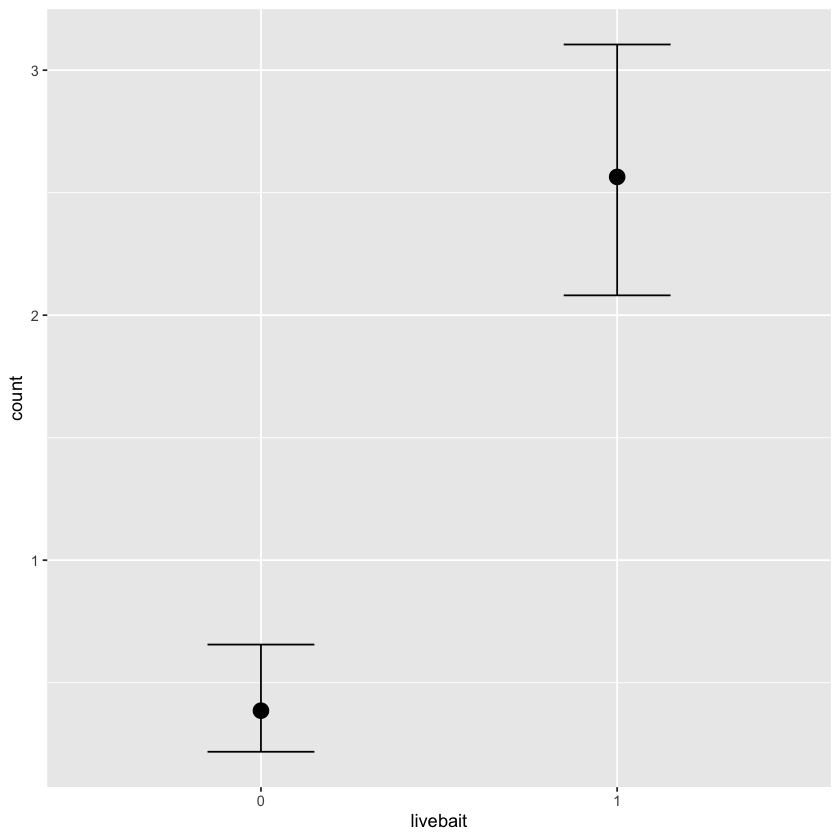

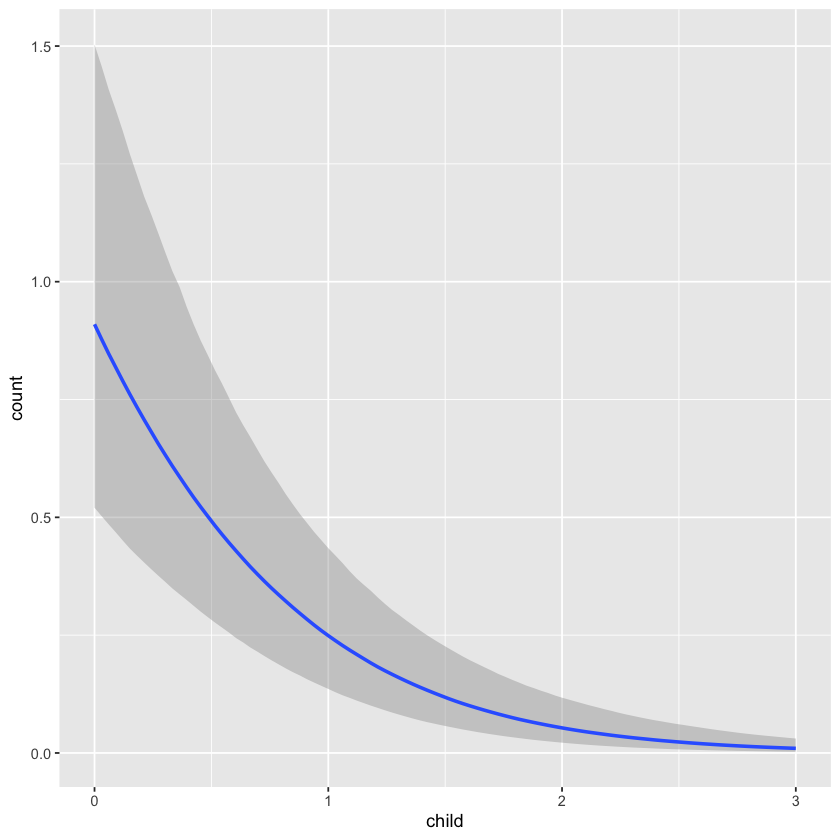

In [15]:
plot(conditional_effects(fit1), ask = FALSE)


In [16]:
fit1

 Family: zero_inflated_poisson 
  Links: mu = log; zi = logit 
Formula: count ~ livebait + child 
         zi ~ child
   Data: zinb (Number of observations: 250) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        0.39      0.27    -0.15     0.91 1.00     3043     2895
zi_Intercept    -0.47      0.18    -0.84    -0.12 1.00     3886     2458
livebait1        1.90      0.28     1.37     2.45 1.00     3123     3011
child           -0.75      0.10    -0.95    -0.58 1.00     2603     2343
zi_child         1.06      0.22     0.63     1.49 1.00     3082     2555

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).